# Sprint19 セグメンテーション１

## 【問題１】 学習と推定

In [ ]:
!pip install tensorflow==1.15.0
!pip install keras==2.2.4

     |████████████████████████████████| 412.3MB 42kB/s 
     |████████████████████████████████| 512kB 36.1MB/s 
     |████████████████████████████████| 3.8MB 31.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=4785d522510381734c3f74c31f294cd9113ec5fb81ee50d920907ad07702080f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: 

In [ ]:
import tensorflow
tensorflow.__version__

'1.15.0'

In [ ]:
# 自分のマイドライブにマウントする
import os
from google.colab import drive
drive.mount('/content/drive/')
print(os.getcwd())

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content


In [ ]:
# Kaggle API をインストールして
!pip install kaggle
if not os.path.exists(".kaggle"):
  os.mkdir(".kaggle")
!ls -a

# Kaggleと接続するためのトークンをjsonファイルで保存
import json
token = {"username":"*****","key":"*****"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

# ？？？
!chmod 600 /content/.kaggle/kaggle.json
!ls -a .kaggle

.  ..  .config	drive  .kaggle	sample_data
.  ..  kaggle.json


In [ ]:
mkdir　/root/.kaggle/

In [ ]:
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [ ]:
# Kaggle API でデータセットをダウンロードする

os.chdir('/content/drive/My Drive/diveintocode-ml/Kaggle')
print(os.getcwd())
# TGS-Saltフォルダを作成して、そこに移動
if not os.path.exists("TGS-Salt"):
  os.mkdir("TGS-Salt")
os.chdir("TGS-Salt")
print(os.getcwd())

# 一度だけ実行：　TGS-Saltデータセットをダウンロード
#!kaggle competitions download -c tgs-salt-identification-challenge

/content/drive/My Drive/diveintocode-ml/Kaggle
/content/drive/My Drive/diveintocode-ml/Kaggle/TGS-Salt


In [ ]:
# 一度だけ実行：　ダウンロードしたZIPファイルを解凍（train.zip, test.zip）
#!unzip /content/drive/'My Drive'/diveintocode-ml/Kaggle/TGS-Salt/train.zip -d train
#!rm train.zip
#!unzip /content/drive/'My Drive'/diveintocode-ml/Kaggle/TGS-Salt/test.zip -d test
#!rm test.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/My Drive/diveintocode-ml/GitClone')
print(os.getcwd())
# 一度だけ実行：　UNetをGit Clone
#!git clone https://github.com/zhixuhao/unet.git

/content/drive/My Drive/diveintocode-ml/GitClone


In [ ]:
os.chdir('/content/drive/My Drive/diveintocode-ml/GitClone/unet/data')
print(os.getcwd())
# TGS-Saltフォルダを作成して、そこに移動
if not os.path.exists("tgs"):
  os.mkdir("tgs")
os.chdir('/content/drive/My Drive/diveintocode-ml/GitClone/unet/data/tgs')

# 一度だけ実行： UNetディレクトリ内にTGS-Saltのtrain, testデータをコピー
#!cp -r /content/drive/"My Drive"/diveintocode-ml/Kaggle/TGS-Salt/train /content/drive/"My Drive"/diveintocode-ml/GitClone/unet/data/tgs
#!cp -r /content/drive/"My Drive"/diveintocode-ml/Kaggle/TGS-Salt/test /content/drive/"My Drive"/diveintocode-ml/GitClone/unet/data/tgs

# predictフォルダを作成
if not os.path.exists("predict"):
  os.mkdir("predict")

os.chdir('/content/drive/My Drive/diveintocode-ml/GitClone/unet')


/content/drive/My Drive/diveintocode-ml/GitClone/unet/data


### main.pyのコードを変更する
```python
from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)

model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])

testGene = testGenerator("data/membrane/test")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/membrane/test",results)
```

train_path, image_folder, mask_folder, hdf5ファイル名, testGeneratorを変更する。


```python
myGene = trainGenerator(2,'data/tgs/train','images','masks',data_gen_args,save_to_dir = None)

model = unet()
model_checkpoint = ModelCheckpoint('unet_tgs.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])

testGene = testGenerator("data/tgs/test")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/tgs/predict",results)
```


### data.pyの変更  
testGeneratorのパスを%d.pngからglobで取得するように変更

In [ ]:
!python main.py

Using TensorFlow backend.





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/content/drive/My Drive/diveintocode-ml/GitClone/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.


2020-06-25 10:32:20.906948: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-06-25 10:32:20.915502: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-06-25 10:32:20.915767: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2006bc0 initialized for platform Host (this doe

In [57]:
!python train.py

Using TensorFlow backend.





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/content/drive/My Drive/diveintocode-ml/GitClone/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



2020-06-25 12:55:41.567404: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-06-25 12:55:41.573531: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-06-25 12:55:41.573795: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0xde31480 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-06-25 12:55:41.573832: I tensorflow/compiler

In [58]:
!python predict.py

Using TensorFlow backend.





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/content/drive/My Drive/diveintocode-ml/GitClone/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



2020-06-25 13:33:22.023360: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-06-25 13:33:22.029407: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-06-25 13:33:22.029718: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0xde3d480 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-06-25 13:33:22.029772: I tensorflow/compiler

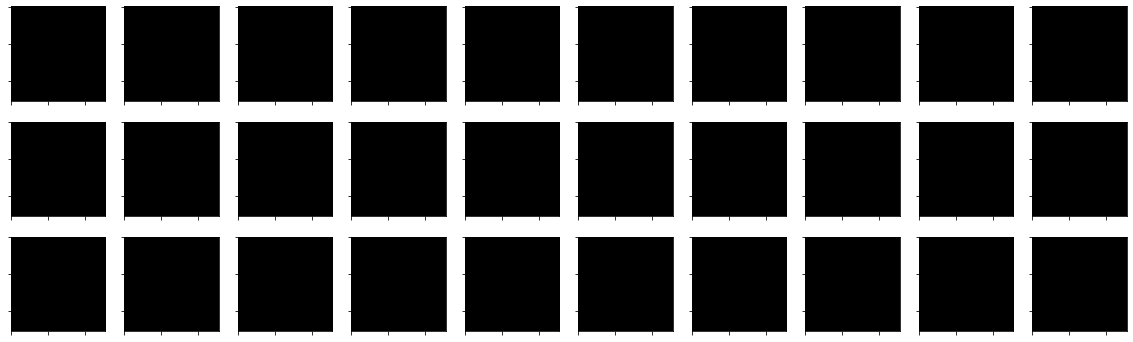

In [59]:
import matplotlib.pyplot as plt
import glob
import cv2
predict_dir = '/content/drive/My Drive/diveintocode-ml/GitClone/unet/data/tgs/predict'
img_path_list = glob.glob(predict_dir + '/*' + ".png")

fig, ax = plt.subplots(3, 10, figsize=(20, 6))
x = 0
y = 0
for img_path in img_path_list:
  img = cv2.imread(img_path)
  # BGR => RGB
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  ax[x, y].imshow(img_rgb)
  ax[x, y].set_xlabel
  ax[x, y].grid(False)
  ax[x, y].set_yticklabels([])
  ax[x, y].set_xticklabels([])

  # x, y
  y += 1
  if y == 10:
    x += 1
    y = 0


まだまだ学習が足りない。

## 【問題２】 コードリーディング
論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

- contracting path（収縮）

2つのConv2Dと MaxPooling2Dで特徴抽出をおこない、
１回のダウンサンプリングでチャネル数が２倍になるように、設計されている。  
チャネル数を増やしながら、MaxPoolingでサイズは小さくなっていく。  
4回目以降は、dropoutも入ってくる。

```python

    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)    
```

- expansive path（拡張）

特徴マップを拡張していく部分（後半）は、ダウンサンプリングと対称なLayer構成になっている（UPSampling + ２回Conv2D）。  
１回のアップサンプリングでチャネル数が半分になり、段階的に解像度が回復するように設計されている。  

mergeでは、同階層のダウンサンプリングによる特徴マップとアップサンプリングの出力を結合する。  

```python
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
```

- ピクセル分類

UNetは全結合層なしなので、Conv2Dの出力に対して、sigmoid関数を適用し、これを最終出力とする。  
コードでは、多クラス分類の場合もsoftmaxは使用せず、one-hotに変換してsigmoid関数を適用しているような気がする（adjustData関数）。

```python
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)


def adjustData(img,mask,flag_multi_class,num_class):
    if(flag_multi_class):
        img = img / 255
        mask = mask[:,:,:,0] if(len(mask.shape) == 4) else mask[:,:,0]
        new_mask = np.zeros(mask.shape + (num_class,))
        for i in range(num_class):
            #for one pixel in the image, find the class in mask and convert it into one-hot vector
            #index = np.where(mask == i)
            #index_mask = (index[0],index[1],index[2],np.zeros(len(index[0]),dtype = np.int64) + i) if (len(mask.shape) == 4) else (index[0],index[1],np.zeros(len(index[0]),dtype = np.int64) + i)
            #new_mask[index_mask] = 1
            new_mask[mask == i,i] = 1
        new_mask = np.reshape(new_mask,(new_mask.shape[0],new_mask.shape[1]*new_mask.shape[2],new_mask.shape[3])) if flag_multi_class else np.reshape(new_mask,(new_mask.shape[0]*new_mask.shape[1],new_mask.shape[2]))
        mask = new_mask
    elif(np.max(img) > 1):
        img = img / 255
        mask = mask /255
        mask[mask > 0.5] = 1
        mask[mask <= 0.5] = 0
    return (img,mask)
```
- padding="same"  
sameというのは入力と出力が同じサイズになるようにパディングするということらしい。  